In [1]:
####### importing all required packages here ##########
import numpy as np
import random
import time
import matplotlib.pyplot as plt

In [2]:
###### Fucntion for creating random adjacency matrix. #########

def create_adjacency_matrix(number_of_vertices, probability):
    adj_matrix = np.ones((number_of_vertices,number_of_vertices))
    for i in range(0,number_of_vertices):
        for j in range(0,number_of_vertices):
            if random.random()>probability:
                adj_matrix[i,j]=0

    return adj_matrix

In [3]:
###### Function for converting binary number to decimal #######

def dec_to_bin(decimal, no_bits):
    binary = np.zeros((no_bits))
    for i in range(no_bits-1,-1,-1):
        #print(decimal, i)
        if int(decimal/(2**i)):
            binary[i]=1
        decimal = decimal%(2**i)
    
    return binary

In [4]:
####### Using Brute force ########

def brute_force(n, adj_matrix):
    best_cost = 0
    best_case = None
    for k in range(2**n):
        binary_k=dec_to_bin(k, n)
        temp_cost = 0
        for i in range(n):
            for j in range(n):
                temp_cost = temp_cost + adj_matrix[i,j]*binary_k[i]*(1-binary_k[j])
        if temp_cost > best_cost:
            best_cost = temp_cost
            best_case = binary_k

    return best_cost

In [5]:
cost_vs_n = list()
cost = list()
for j in range(4,40):
    for i in range(5):
        cost.append(brute_force(j, create_adjacency_matrix(j, 0.5)))
    average_cost = sum(cost)/5
    (x, y) = (j, average_cost)
    cost_vs_n.append((x, y))
    cost.clear()
print(cost_vs_n)

KeyboardInterrupt: 

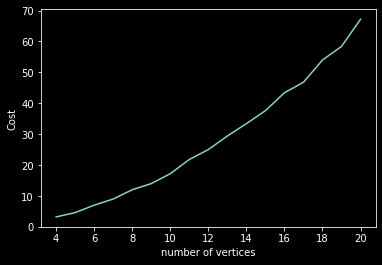

In [8]:
#### plotting cost vs n #####
plt.ylabel('Cost')
plt.xlabel('number of vertices')
x, y = zip(*cost_vs_n)
plt.plot(x, y)